In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
plt.style.use('seaborn')
%matplotlib inline

# Matplotlib Scatter Plots

In this section we are going to learn how to create scatter plots in Matplotlib with the **`axes.scatter()`** method.

<div class="alert alert-block alert-info">
<p>You _can_ actually use the `plot()` method we covered in the previous tutorial to generate scatter plots as well.</p>
<p>
But you should generally use the method we are covering in this tutorial unless you are having significant performance problems.
</p>
<p>The reason for this is that the `axes.scatter()` method provides more control over the visualization. It does this at the cost of performance, but this should only be a factor for plots with huge amounts of data points.</p>
</div> 

### Load Necessary Data Set(s)

In [4]:
seattle_weather_2015_2016 = pd.read_csv(
    './data/seattle_weather_2015_2016.csv')
seattle_weather_2015_2016.head()

,date,low_temp,high_temp,precipitation,snowfall,snowdepth,avgwindspeed,fog,mist,rain,ice,snow,freezingrain,thunder,highwind,hail
0,1/1/15,23.2,51.1,0.00,0.0,0.0,4.70,No,No,No,No,No,No,No,No,No
1,1/2/15,41.0,54.0,0.00,0.0,0.0,2.91,No,No,No,No,No,No,No,No,No
2,1/3/15,46.0,51.1,0.16,0.0,0.0,3.80,Yes,No,No,No,No,No,No,No,No
3,1/4/15,48.9,69.1,0.29,0.0,0.0,10.07,Yes,No,No,No,No,No,No,No,No
4,1/5/15,32.0,55.9,0.00,0.0,0.0,5.37,No,No,No,No,No,No,No,No,No


## Scatter Plots
Let's start exploring Matplotlib's **`axes.scatter()`** method's functionality by charting the precipitation records from our dataframe.

### A Simple Scatter Plot

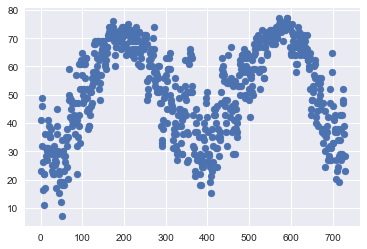

In [5]:
figure, axes = plt.subplots()


axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'])

#### Adjusting Marker Color(s)
With scatter plots, you can assign a single color to each plot, just like you can with line plots. The only difference here is that you use the **`c`** parameter rather than **`color`**.

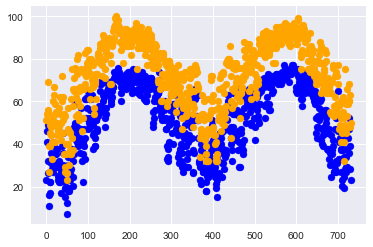

In [6]:
figure, axes = plt.subplots()

# We'll plot high and low temps with different colors.
axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c='blue')

axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'], 
             c='orange')

<div class="alert alert-block alert-info">
<p>Technically, you can use the `color` argument, but if you do, it won't work with the next technique.</p>
</div> 

But you can also assign a unique color to each marker in your plot - which can lead to some very cool and powerful visualizations.

The key here is that you have to use two arguments in combination: 
* **`c`**: Previously, we only used this as a single value argument, but now you have to pass it a list/array that contains a numeric element for each data point in your plot. You have to have the exact same number of elements as plot items or you will get an error.
* **`cmap`**: A valid colormap name. Matplotlib automatically converts all your numeric values in **`c`** to a float between 0 and 1 and then picks the corresponding color out of a given colormap for each marker. There are many different colormaps available. You can see many of the available options in Matplotlib's <a href="https://matplotlib.org/users/colormaps.html" target="_blank">online documentation</a>.

Now let's provide a couple of examples:

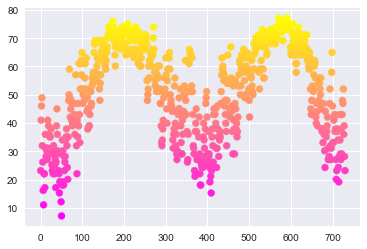

In [9]:
figure, axes = plt.subplots()

# We'll plot high and low temps with different colors.
# We will pair our low temp ratings to the colormap
# itself so that low temps will get mapped to one
# end of the colormap and higher temps to the other.
axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='spring')

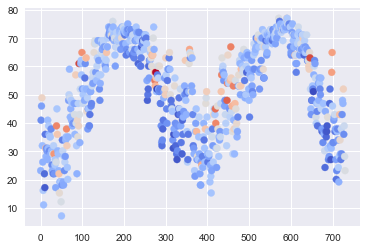

In [8]:
figure, axes = plt.subplots()

# We'll plot high and low temps with different colors.
# We will pair our avg wind speed to the colormap
# itself so that low wind speed will get mapped to one
# end of the colormap and higher wind speed to the other.
axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['avgwindspeed'], 
             cmap='coolwarm')

#### Adding a Colorbar

<div class="alert alert-block alert-warning">
<p>Adding a colorbar requires interacting with the `figure` object directly. This is the first time that we've done this.</p>
<p>Make sure when you are working on your assignments not to try adding colorbars to the `axes` object or you'll have all sorts of problems.</p>
</div> 

When you have a plot of a continous variable(s) where color is used to signify the values of the variable a colorbar is a great addition to your plot.

To add a colorbar to your plot, you use the **`figure.colorbar()`** method.

The method requires a single argument: an image which has been "painted" onto an *`axes`* object.

It just so happens that when you call the *`axes.scatter`* method, it not only plots such an image, but it also returns a reference to that image.

Up until now, we've just ignored it, but now let's capture it so that we can pass it along to **`figure.colorbar`**:

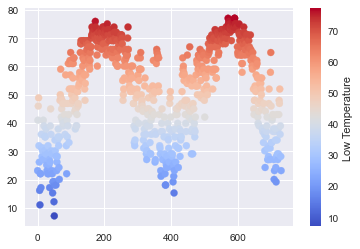

In [13]:
figure, axes = plt.subplots()

sc_image = axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='coolwarm')

figure.colorbar(
    sc_image,
    label='Low Temperature' # You can also add a label
)

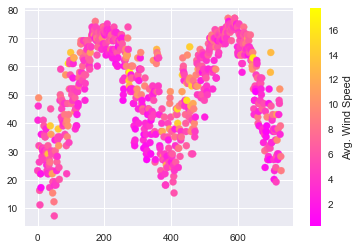

In [14]:
figure, axes = plt.subplots()

scatter_image = axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['avgwindspeed'], 
             cmap='spring')

figure.colorbar(
    scatter_image,
    label='Avg. Wind Speed' # You can also add a label
)

You can also add multiple colorbars:

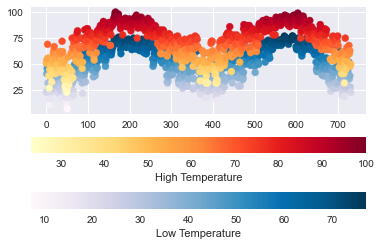

In [15]:
# Plotting high & low temps with different colormaps
# along with separate colorbars
figure, axes = plt.subplots()

low_temps = axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

high_temps = axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'],
             c=seattle_weather_2015_2016['high_temp'], 
             cmap='YlOrRd')

figure.colorbar(low_temps, label="Low Temperature", orientation = 'horizontal')
figure.colorbar(high_temps, label = "High Temperature", orientation = 'horizontal')

# Activity

### Scatter plot

* Plot a scatter plot for 'avgwindspeed' in the seattle dataset. 
    * Adjust the following parameters for color map based on windspeed
        * c
        * cmap
    * Show a colorbar indicating the mapping of the speed of wind to color. 

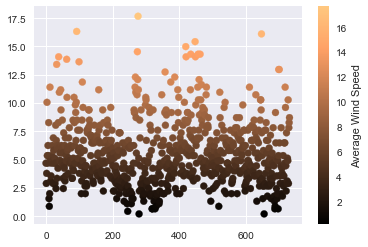

In [18]:
figure, axes = plt.subplots()

sc_image = axes.scatter(seattle_weather_2015_2016.index, 
                        seattle_weather_2015_2016['avgwindspeed'], 
                        c= seattle_weather_2015_2016['avgwindspeed'],
                       cmap = 'copper')
figure.colorbar(sc_image, 
               label = "Average Wind Speed")

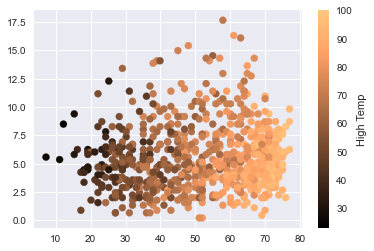

In [20]:
figure, axes = plt.subplots()

sc_image = axes.scatter(seattle_weather_2015_2016['low_temp'], 
                        seattle_weather_2015_2016['avgwindspeed'], 
                        c= seattle_weather_2015_2016['high_temp'],
                       cmap = 'copper')
figure.colorbar(sc_image, 
               label = "High Temp")

### Setting a different style for plots

In [21]:
# Select a style, it will affect all subsequent plots.
# Showing you different style 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Bar Plots in Matplotlib

Simple Line plots and Histograms are very useful when you have quantitative (continous) data type. Bar plots are useful for plotting **categorical** data types. 

In [22]:
flights = pd.read_csv("./data/flight_sample.csv")
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
0,2015,8,19,3,EV,3260,7.0,20.0,1091
1,2015,9,23,3,WN,3050,4.0,9.0,837
2,2015,10,16,5,AA,1382,13.0,25.0,761
3,2015,1,19,1,WN,4274,5.0,23.0,1547
4,2015,4,22,3,WN,2237,5.0,18.0,872


Let us say you want to find how flights are in the dataset corresponding to each airline. 

You can do this by groupby() and the size() to find the number of airlines in each group.

In [23]:
flights_by_Airline = flights.groupby(["AIRLINE"])
num_flights_airline = flights_by_Airline.size()
num_flights_airline

AIRLINE
AA    1216
AS     311
B6     450
DL    1518
EV    1001
F9     143
HA     121
MQ     510
NK     211
OO    1027
UA     894
US     300
VX     110
WN    2188
dtype: int64

Text(0.5, 1.0, 'The distribution of flights across airlines')

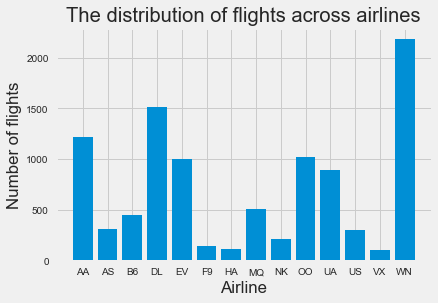

In [24]:
figure, axes = plt.subplots()

axes.bar(range(len(num_flights_airline.index)), num_flights_airline)

# This below line will set the ticks at every number
axes.set_xticks( range(len(num_flights_airline.index)))

# This below line will renamed the ticks from numbers to the airlines
axes.set_xticklabels(num_flights_airline.index)

axes.set_xlabel("Airline")
axes.set_ylabel("Number of flights")
axes.set_title("The distribution of flights across airlines")

### Tight integration with pandas

Instead of writing such a long code. The matplotlib is tightly integrated with pandas. So you can write simple code as below

In [25]:
num_flights_airline

AIRLINE
AA    1216
AS     311
B6     450
DL    1518
EV    1001
F9     143
HA     121
MQ     510
NK     211
OO    1027
UA     894
US     300
VX     110
WN    2188
dtype: int64

<AxesSubplot:xlabel='AIRLINE'>

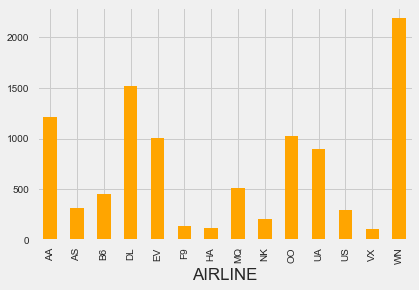

In [27]:
figure, axs = plt.subplots()

num_flights_airline.plot(ax=axs, kind='bar', color='orange')

**Wow** That was easy! 

Plotting bar plots has a lot more features. Look [here](https://matplotlib.org/examples/api/barchart_demo.html) for more examples. 

# Activity

* Group the flights by 'MONTH' and find the number of flights in each month. 

* Plot a *bar* plot with each month on the x-axis and the height of the bar indicating the number of flights
    * Make sure you rename the ticks to be 'Jan', 'Feb', 'Mar', 'Apr',..., 'Dec' using axes.set_xticklabels() method. 

In [28]:
flights_by_month = flights.groupby(['MONTH'])
num_flights_by_m = flights_by_month.size()
num_flights_by_m

MONTH
1     825
2     765
3     854
4     884
5     823
6     871
7     839
8     857
9     786
10    878
11    816
12    802
dtype: int64

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

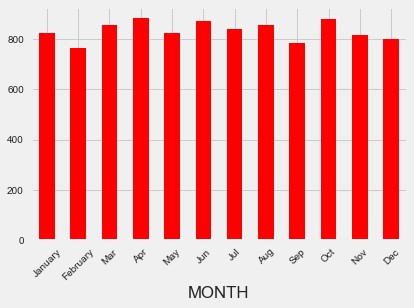

In [35]:
figure, axes = plt.subplots()

num_flights_by_m.plot(ax = axes, kind = 'bar', color = "red")
axes.set_xticklabels(['January', 'February', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                     rotation = 45)

## Bar plots with multiple bars

In [36]:
# Compute the median distance travelled by each airline by each month using pivot table

med_dist_month_airline = flights.pivot_table('DISTANCE', index='MONTH', columns = 'AIRLINE', aggfunc = np.median)

In [37]:
med_dist_month_airline

AIRLINE,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
MONTH,,,,,,,,,,,,,,
1,1061.0,1050.0,1001.0,584.5,395.0,967.0,163.0,420.0,1029.5,438.0,967.0,683.0,2475.0,601.0
2,932.5,867.0,1076.0,680.0,403.0,979.0,189.5,420.0,977.0,387.0,1066.5,728.0,447.0,637.0
3,1089.0,1024.0,1010.0,600.0,565.5,896.0,163.0,312.0,1002.0,391.0,1009.0,890.0,1476.0,611.0
4,1045.0,954.0,1046.5,656.0,383.0,897.5,216.0,409.0,925.0,481.0,1201.0,696.5,1157.5,591.0
5,1050.0,923.0,943.5,594.0,427.0,1018.0,189.5,435.0,1006.0,479.5,967.0,841.0,1846.0,682.0
6,989.0,873.0,944.0,680.0,427.0,1476.0,216.0,301.5,925.0,440.0,1001.0,599.0,1747.0,630.0
7,1045.0,1249.0,1028.0,696.0,474.0,972.5,121.0,429.0,867.0,567.0,1341.0,NaN,550.0,687.0
8,951.0,931.5,1065.0,689.0,408.0,978.0,2338.0,413.0,925.0,449.0,1010.0,NaN,1476.0,577.0
9,853.0,978.0,651.5,594.0,458.0,908.0,216.0,349.0,1076.0,451.0,978.0,NaN,1381.0,562.0


In [38]:
# Selecting only three airlines to visualize
med_dist_only_3 = med_dist_month_airline[['AA','AS','DL']]

In [39]:
med_dist_only_3

AIRLINE,AA,AS,DL
MONTH,,,
1,1061.0,1050.0,584.5
2,932.5,867.0,680.0
3,1089.0,1024.0,600.0
4,1045.0,954.0,656.0
5,1050.0,923.0,594.0
6,989.0,873.0,680.0
7,1045.0,1249.0,696.0
8,951.0,931.5,689.0
9,853.0,978.0,594.0


Text(0, 0.5, 'Median DIstance')

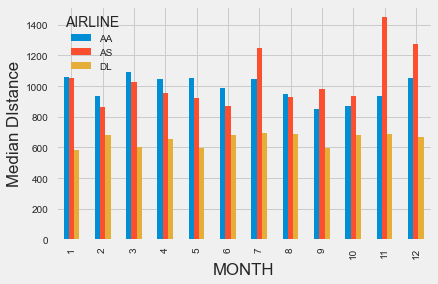

In [41]:
figure, axes = plt.subplots()

med_dist_only_3.plot(ax = axes, kind='bar')
axes.set_ylabel("Median DIstance")

Text(0, 0.5, 'Median Distance')

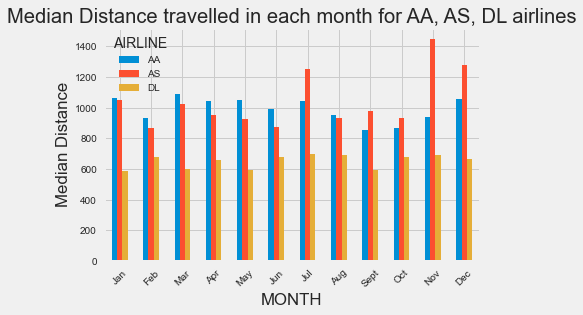

In [42]:
figure, axes = plt.subplots()

med_dist_only_3.plot(ax = axes, kind='bar')

# Setting the ticks appropriately
axes.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'], rotation=45)
axes.set_title("Median Distance travelled in each month for AA, AS, DL airlines")
axes.set_ylabel("Median Distance")

# Activity

* Pivot table based on 'DAY_OF_WEEK' as index and 'AIRLINE' as column to find the **average taxi in (TAXI_IN)** time.  

* Select the three columns corresponding to Southwest (WN), JetBlue (B6), and Hawaiin (HA)

* Plot multiple bars for average taxi in time for the three airlines for each of the seven days. 
    * Make sure you rename the ticks to be 'Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun' using axes.set_xticklabels() method. 

In [43]:
# Pivot table
taxi_in = flights.pivot_table('TAXI_IN', index = 'DAY_OF_WEEK', columns = 'AIRLINE')
taxi_in

AIRLINE,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
DAY_OF_WEEK,,,,,,,,,,,,,,
1,9.512048,6.312500,5.984375,7.476636,7.915663,9.360000,6.333333,8.400000,7.562500,6.703448,8.955556,7.066667,7.500000,6.569132
2,9.173913,5.962963,5.675676,6.703057,7.207407,11.720000,6.909091,9.975000,8.272727,6.940789,8.878261,6.214286,6.611111,6.042071
3,8.851351,6.905660,5.814815,7.159836,7.666667,10.000000,6.142857,9.424658,7.571429,6.724832,8.744186,8.500000,9.000000,6.355049
4,8.949438,6.181818,6.226667,7.829787,7.221557,10.880000,8.350000,7.256410,7.793103,6.876623,8.110294,9.250000,7.736842,6.606349
5,9.509524,6.613636,5.290323,7.118483,8.014815,10.227273,7.928571,8.302632,9.888889,6.426471,8.793651,7.000000,7.166667,5.790274
6,8.660000,6.575000,5.745763,7.344828,8.121739,10.692308,7.357143,7.560000,10.875000,6.476562,8.058333,10.621622,7.285714,6.137546
7,8.840000,6.545455,7.107143,7.338164,7.885496,8.200000,7.733333,8.283582,10.758621,6.867133,8.957627,7.055556,7.500000,6.242038


In [44]:
# Select the three airlines
taxi_in_3 = taxi_in[['WN', 'B6', 'HA']]
taxi_in_3

AIRLINE,WN,B6,HA
DAY_OF_WEEK,,,
1,6.569132,5.984375,6.333333
2,6.042071,5.675676,6.909091
3,6.355049,5.814815,6.142857
4,6.606349,6.226667,8.350000
5,5.790274,5.290323,7.928571
6,6.137546,5.745763,7.357143
7,6.242038,7.107143,7.733333


[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thu'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Sat'),
 Text(6, 0, 'Sun')]

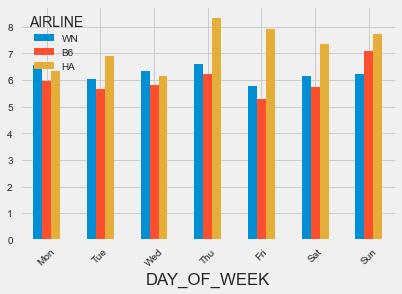

In [47]:
# Visualize
figure, axes = plt.subplots()

taxi_in_3.plot(ax = axes, kind = 'bar')
axes.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation = 45)

# Making Interactive Plots

Instead of saying `%matplotlib inline` if you used **`%matplotlib notebook`** you can interact with your plots. This is makes visualization even more **fun**!

In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Add this after your imports to configure Jupyter to 
# display your plots and INTERACT with them
%matplotlib notebook

<IPython.core.display.Javascript object>


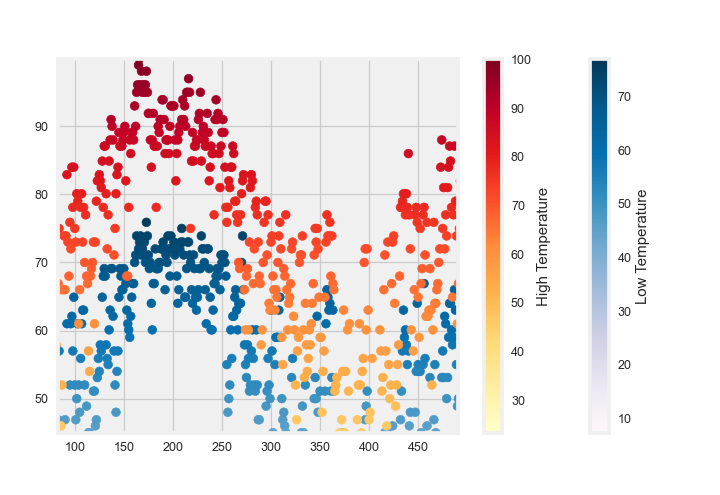

In [52]:
# Plotting high & low temps with different colormaps
# along with separate colorbars
figure, axes = plt.subplots()

low_temps = axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

high_temps = axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'],
             c=seattle_weather_2015_2016['high_temp'], 
             cmap='YlOrRd')

figure.colorbar(low_temps, label="Low Temperature")
figure.colorbar(high_temps, label = "High Temperature")

# Matplotlib Histograms

In this section, we are going to learn how to create histograms, which are a great way of summarizing data sets.

The basic idea of a histogram is to create "buckets" into which your data points fall into and display those rather than individually displaying all the data points.

In [53]:
nd_football_roster = pd.read_csv('./data/nd-football-2021-roster.csv')
seattle_weather_2015_2016 = pd.read_csv(
    './data/seattle_weather_2015_2016.csv')

## One Dimensional Histograms
Simple, one dimensional histograms are created with the **`axes.hist()`** method.

### A Basic Histogram
This create a basic histogram: you simply have to pass a NumPy array or Pandas series object to it. 

By default, it will create a set of buckets from the values in your array/series along the x-axis and then display how many elements fall in each bucket via the y-axis.

<IPython.core.display.Javascript object>


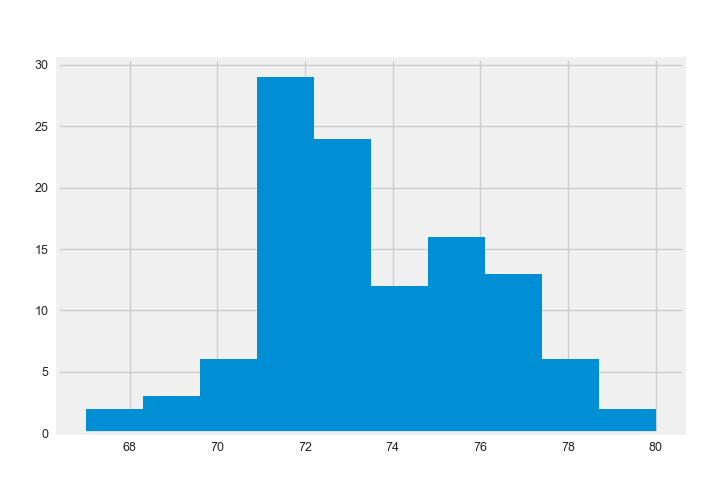

(array([ 2.,  3.,  6., 29., 24., 12., 16., 13.,  6.,  2.]),
 array([67. , 68.3, 69.6, 70.9, 72.2, 73.5, 74.8, 76.1, 77.4, 78.7, 80. ]),
 <BarContainer object of 10 artists>)

In [55]:
# Create a histogram of ND Football Player Heights
# You can quickly see the most common height bucket
# on the team.
figure, axes = plt.subplots()
axes.hist(nd_football_roster['Height'])

As always, you can adjust the title, label, and legend properties of the **`axes`** object.

<IPython.core.display.Javascript object>


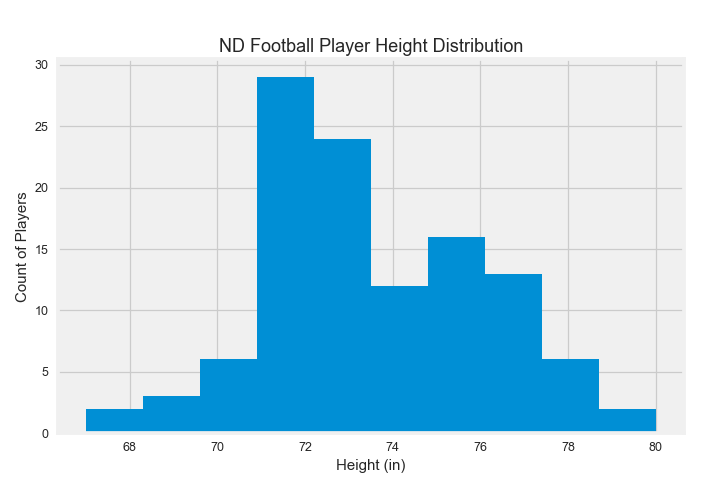

No handles with labels found to put in legend.


Text(0, 0.5, 'Count of Players')

In [56]:
# Adding title, labels, and legend
figure, axes = plt.subplots()
axes.hist(nd_football_roster['Height'])
axes.legend()
axes.set_title('ND Football Player Height Distribution')
axes.set_xlabel('Height (in)')
axes.set_ylabel('Count of Players')

### Customizing Histograms

#### Changing the Number of Bins
Matplotlib tries to guess the number of bins you want for your histograms and it generally does a good job at this. Nonetheless, you may want to increase/decrease the default to adjust the granularity of your plot.

You can do so with the `bins` parameter.

<IPython.core.display.Javascript object>


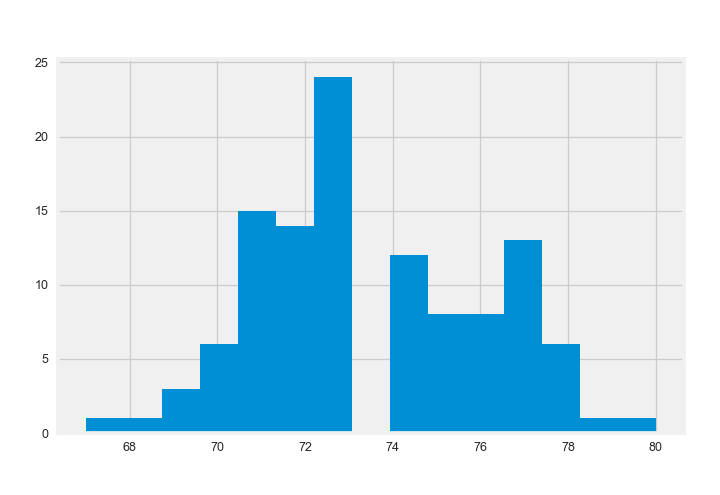

(array([ 1.,  1.,  3.,  6., 15., 14., 24.,  0., 12.,  8.,  8., 13.,  6.,
         1.,  1.]),
 array([67.        , 67.86666667, 68.73333333, 69.6       , 70.46666667,
        71.33333333, 72.2       , 73.06666667, 73.93333333, 74.8       ,
        75.66666667, 76.53333333, 77.4       , 78.26666667, 79.13333333,
        80.        ]),
 <BarContainer object of 15 artists>)

In [59]:
figure, axes = plt.subplots()

# Adjust the number of bins to 15
# The increased granularity will
# expose some heights that aren't represented
# on the team.
axes.hist(nd_football_roster['Height'], bins=15)

#### Changing a Range for Bins
We know that we can use the `axes.set_xlim` and `axes.set_ylim` methods to focus/zoom into one area of a plot.

The **`range`** parameter is somewhat similar functionally to this in that it allows you to specify the range of input values to plot.

The key difference is that when you use the **`range`** parameter, Matplotlib does all the binning/grouping within the range specified.

With `set_xlim`/`set_ylim` you would simply zoom into a smaller area of the plot. This parameter allows you to calculate the histogram with a subset of your data.

Let's demonstrate using our Seattle Weather dataset.

<IPython.core.display.Javascript object>


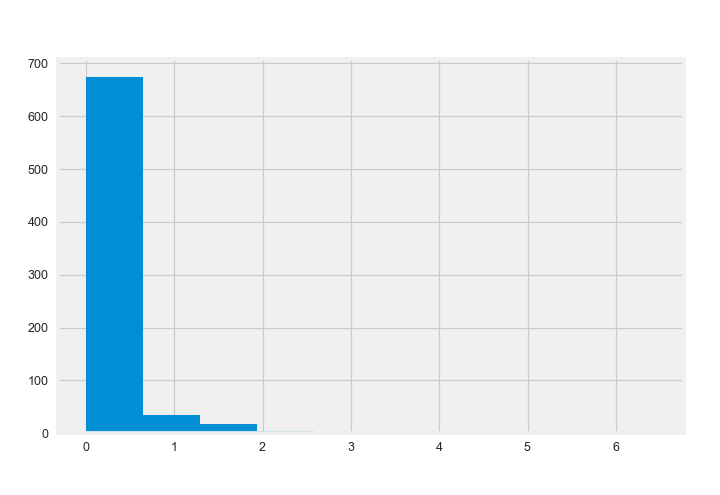

(array([674.,  35.,  17.,   4.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.   , 0.645, 1.29 , 1.935, 2.58 , 3.225, 3.87 , 4.515, 5.16 ,
        5.805, 6.45 ]),
 <BarContainer object of 10 artists>)

In [60]:
# Simply plot the precipitation records
# with default parameters.
figure, axes = plt.subplots()
axes.hist(seattle_weather_2015_2016['precipitation'])

Because there are so many records with no rain, it skews the chart. If fact, the distortion is so high, that we can't visually make out any records above 2 inches (though we know they must be there because of the bins Matplotlib created).

Let's focus our histogram between .5 and 2.5 inches:

<IPython.core.display.Javascript object>


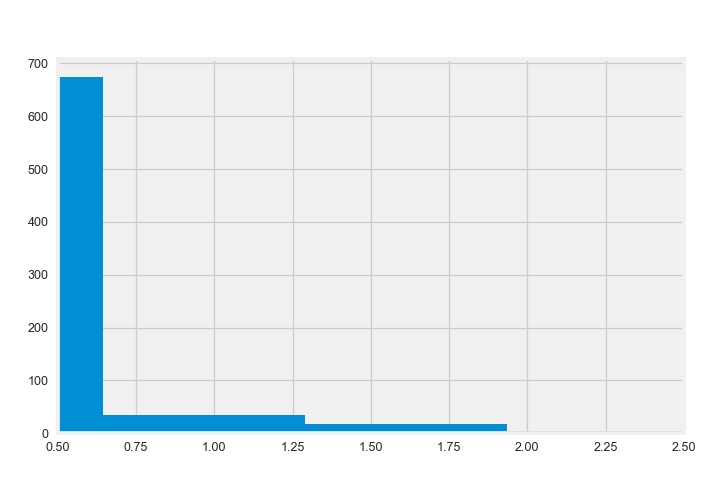

(0.5, 2.5)

In [61]:
# Simply plot the precipitation records
# with default parameters.
figure, axes = plt.subplots()
axes.hist(seattle_weather_2015_2016['precipitation'])
axes.set_xlim(0.5,2.5)

As you can see above, it did zoom in the range we wanted between 0.5 and 2.5, but the "binning" is still too coarse. **This is why using range parameter rather than set_xlim**

<IPython.core.display.Javascript object>


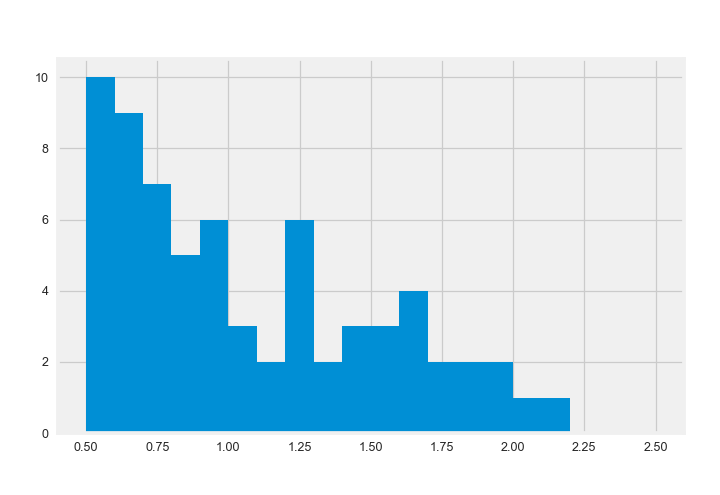

(array([10.,  9.,  7.,  5.,  6.,  3.,  2.,  6.,  2.,  3.,  3.,  4.,  2.,
         2.,  2.,  1.,  1.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
        1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <BarContainer object of 20 artists>)

In [62]:
# This will give us a plot of how many
# reasonably, but not extremely, raining days
# Seattle experienced in 2015-2016
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['precipitation'], 
    range=(.5, 2.5), 
    bins=20)

## Activity

### Histograms

* Drop the rows with missing values

* Plot the histogram of the distance ('DISTANCE') travelled by all the flights in the dataset. 
    * Adjust the parameters
        * bins
        * range
        * color

In [63]:
flights = pd.read_csv("./data/flight_sample.csv")

In [64]:
# Dropping the missing values as plotting the histograms doesn't know how to handle missing data
flights.dropna(inplace=True)

<IPython.core.display.Javascript object>


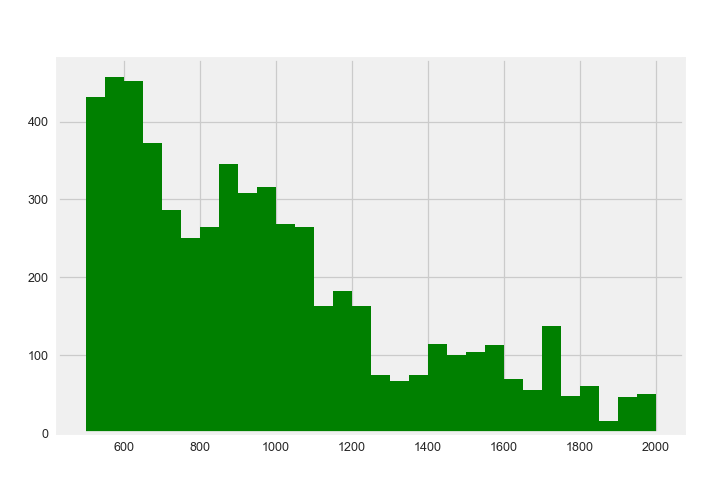

(array([432., 457., 452., 373., 287., 250., 265., 346., 308., 316., 269.,
        265., 163., 182., 163.,  75.,  67.,  74., 115., 100., 104., 113.,
         69.,  56., 137.,  48.,  60.,  16.,  47.,  50.]),
 array([ 500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,  900.,
         950., 1000., 1050., 1100., 1150., 1200., 1250., 1300., 1350.,
        1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750., 1800.,
        1850., 1900., 1950., 2000.]),
 <BarContainer object of 30 artists>)

In [68]:
figure, axes = plt.subplots()

axes.hist(flights['DISTANCE'], 
         bins = 30, 
         range = (500, 2000), 
         color = 'green')

### Overlaying Multiple Histograms
Just like we are able to plot multiple lines on a single axes, we can plot multiple histograms. 

<IPython.core.display.Javascript object>


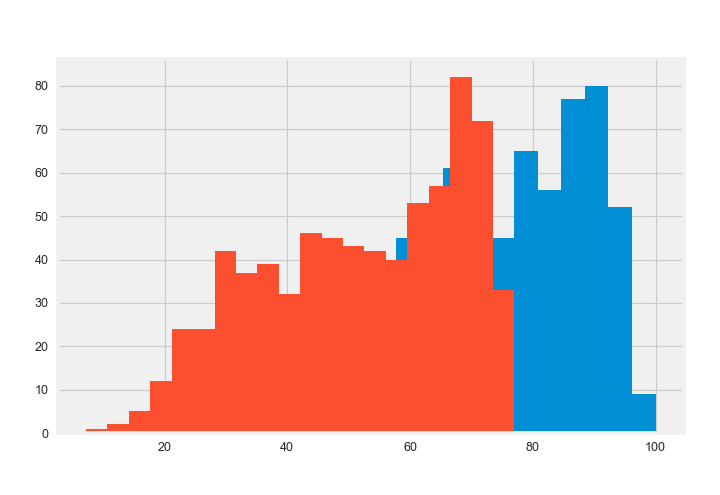

(array([ 1.,  2.,  5., 12., 24., 24., 42., 37., 39., 32., 46., 45., 43.,
        42., 40., 53., 57., 82., 72., 33.]),
 array([ 7.2 , 10.69, 14.18, 17.67, 21.16, 24.65, 28.14, 31.63, 35.12,
        38.61, 42.1 , 45.59, 49.08, 52.57, 56.06, 59.55, 63.04, 66.53,
        70.02, 73.51, 77.  ]),
 <BarContainer object of 20 artists>)

In [69]:
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['high_temp'], 
    bins=20)
axes.hist(
    seattle_weather_2015_2016['low_temp'], 
    bins=20)

That is pretty cool, but there are a number of things that are not ideal with our plot:
1. The low temperatures are in red. 
2. The low temperatures are covering up the high temperatures.
3. There is no legend to clearly deliniate which is which.

Let's combine what we've learned so far about Matplotlib to address these issues.

<IPython.core.display.Javascript object>


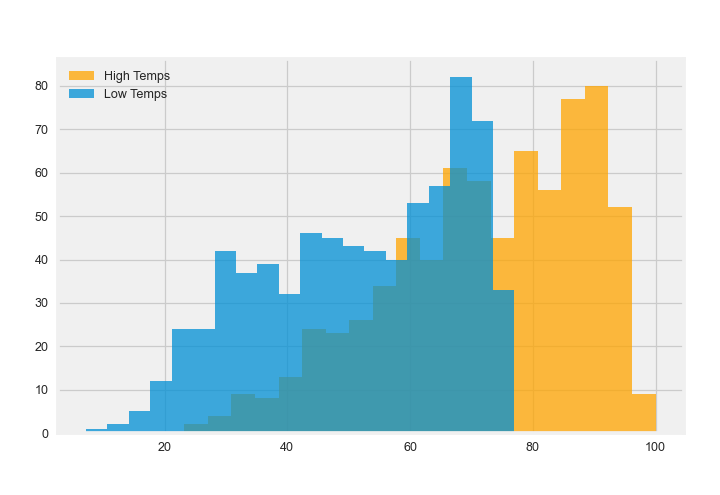

In [70]:
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['high_temp'], 
    bins=20, 
    label='High Temps', # Use label to specify legend name
    color='orange', # Override the default color
    alpha=.75 # Adjust alpha to allow both datasets to appear
)
axes.hist(
    seattle_weather_2015_2016['low_temp'], 
    bins=20, 
    label='Low Temps', # Use label to specify legend name
    alpha=.75 # Adjust alpha to allow both datasets to appear
)

# Enable the legend
axes.legend()

## Activity

### Two Histograms

* Create two DataFrames by extracting flight details of 'AS' (Alaskan Airlines) and 'HA' (Hawaiin Airlines)
    * Use two separate masks for AS and HA airlines



* Plot the histograms of the distance ('DISTANCE') travelled by each of 'AS' and 'HA' airlines
    * Adjust the parameters for each histogram
        * bins
        * range
        * color
        * alpha (opacity)
        * label
    * Provide a legend on the upper right corner to indicate which airline

In [71]:
# Select rows based on the AIRLINE
mask_AS = flights['AIRLINE'] == 'AS'
flights_AS = flights[mask_AS]

mask_HA = flights['AIRLINE'] == 'HA'
flights_HA = flights[mask_HA]

<IPython.core.display.Javascript object>


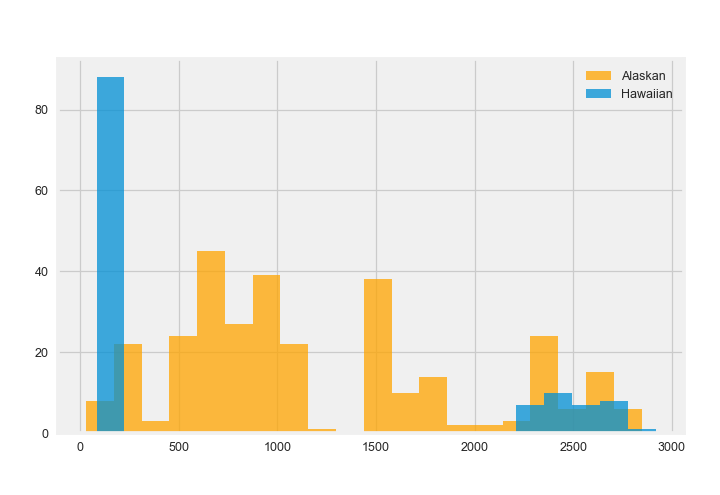

In [72]:
figure, axes = plt.subplots()
axes.hist(
    flights_AS['DISTANCE'], 
    bins=20, 
    label='Alaskan', # Use label to specify legend name
    color='orange', # Override the default color
    alpha=.75 # Adjust alpha to allow both datasets to appear
)
axes.hist(
    flights_HA['DISTANCE'], 
    bins=20, 
    label='Hawaiian', # Use label to specify legend name
    alpha=.75 # Adjust alpha to allow both datasets to appear
)

# Enable the legend
axes.legend()